---
title: "Differential Equations I"
subtitle: ""
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
    html-to-math: katex
    html-math-method: katex
    callout-appearance: minimal
jupyter: python3
---

# The problems to be solved
We will be tackling ordinary differential equations (ODEs). The simplest case is when we are trying to solve a single differential equation for a single function, $y(x)$, where $x$ is known as the _independent variable_ and $y$ is the _dependent variable_.

The first class of equation we will tackle on ODE will be the following _initial-value problem (IVP)_:
$$
y'(x) = f(x,y(x)), \quad y(a) = c,
$$
where $y' = dy/dx$ and $f(x,y)$ is a known function (in general nonlinear) which could depend on both $x$ and $y$. For example, $f(x,y) = 3x^5 - y^3$. We wish to solve for $y$. This is called an _initial-value_ problem because we know the value of $y(x)$ at a certain point, $a$ (i.e., we know that $y(a)=c$, where $c$ is given), so we start from there and try to integrate up to, say, the point $x$, formally, as
$$
y(x) = c + \int_a^x f(z,y(z)) dz.
$$
As you can see, that the integration comes into play. So we will be using some techniques you learned in previous weeks. 

On the other hand, we are here interested in producing not a single number (the value of a definite integral) but a full function, $y(x)$; also, in practice the function $f$ most often does depend on $y$, so the problem we are faced with is more complicated than the ones you see in previous lectures.

For a higher-order ODE, we would have to specify all necessary information at the starting point; for example, in an initial-value problem for a second-order ODE we would need to specify the values of both $y$ (the sought-after function) and $y'$ (its derivative) at $a$:
$$
y''(x)=f(x,y,y'),\quad y(a) = c,\quad y'(a) = d.
$$

In this, more general, case we see that f could also depend on $y$; in other words, we have isolated the highest-order derivative on the left-hand side. Observe that both $y(a)$ and $y'(a)$ are given at the same point, so this is still an initial-value problem. 

A much harder problem, arises when you are given the values of the function at two distinct points, without being provided the starting value of $y'$. . This is known as a _boundary-value problem (BVP)_, which we will tackle in its simplest possible form, namely that of a second-order ODE:
$$
y''(x) = f(x,y,y'), \quad y(a) = c, \quad y(b) = d.
$$
The input data, $y(a) = c$ and $y(b) = d$ are known as _boundary conditions_. BVP are in general more complicated: they can have no solutions or infinitely many solutions, but we will mainly focus on BVPs which have a single solution here. 


An even harder problem arises when $f$ generalized to depend not only on $x$, $y$, and $y'$, but also on a parameter $s$; this is an _eigenvalue problem (EVP)_:
$$
y''(x) = f(x,y,y';s), \quad y(a) = c, \quad y(b) = d.  
$$

This equation only has non-trivial solutions for special values of $s$. This means that we will need to computationally find the appropriate values of $s$. Viewed from another perspective, instead of having a single equation to solve, the EVP describes a family of equations (and correspondingly more than one solutions). Unsurprisingly, such an eigenvalue problem has close connections both to the matrix eigenvalues we encountered and to the eigenvalues appearing in the Schrodinger equation (where the role played by $s$ here was played by the eigenenergy $E$).


# Initial-Value Problems
As mentioned above, we will write a general IVP in the form:
$$
y'(x) = f(x,y(x)),\quad y(a) = c.
$$

We will employ a _discretization_, more specifically an equally spaced grid of points, as for Newton–Cotes quadrature. We will be trying to compute the function $y(x)$ at a set of $n$ grid points $x_j$, from $a$ to $b$:
$$
x_j = a + jh
$$
where as usual $j = 0,1,\dots,n-1$. The step size $h$ is obviously given by:
$$
h = \frac{b-a}{n-1}.
$$

Let us introduce some more notation. At a given grid point, $x_j$, the exact solution of our ODE will be $y(x_j)$; we will use the symbol $y_j$ to denote the approximate solution, i.e., the value that results from a given discretization scheme. We now turn to a discussion of specific methods that will help us make $y_j$ increasingly closer to $y(x_j)$.

##  Euler's Method
The simplest possible approach is known as Euler's method. In what follows, we will motivate it, discuss its error behavior, as well a scenario where it gets in trouble (and then
we'll see what we can do about that).

### Forward Euler
We can motivate what is known as the _forward Euler method_ starting from the forward difference formula. We will use the finite difference formula (derived from Taylor expansion and mid-value theorem) you saw before:
$$
y'(x_j) = \frac{y(x_{j+1})-y(x_j)}{h} - \frac{h}{2}y''(\xi_j)
$$
where $\xi_j$ is a point between $x_j$ and $x_{j+1}$. 

It is assumed that we are starting at $x_j$ and trying to figure out how to make a step onto the next point, $x_{j+1}$. Now, we know that $y(x_j)$ is the exact solution at the point $x_j$, so it must satisfy our ODE
$$
y'(x_j) = f(x_j, y(x_j)).
$$
Using the above two equations, we have
$$
f(x_j,y(x_j)) = \frac{y(x_{j+1})-y(x_j)}{h} - \frac{h}{2}y''(\xi_j),
$$
which leads to 
$$
y(x_{j+1}) = y(x_j) + hf(x_j, y(x_j)) + \frac{h^2}{2}y''(\xi_j).
$$

It is now time to make an approximation. Assuming $h$ is small, the term proportional to $h^2$ will be less important, so we can drop it. This leads to the following prescription:
$$
y_{j+1} = y_{j} + h f(x_j,y_j), \quad j = 0,1,\dots, n-2,\quad y_0 = c.
$$
This is the _forward Euler method_. Note that this is an approximate formula, involving $y_j$ and $y_{j+1}$ instead of $y(x_j)$ and $y(x_{j+1})$. As you have seen, higher-order terms in the Taylor expansion are ignored. We'll see how to do (much) better later.

### Backward Euler
Similarly, one can derive the _backward Euler method_:
$$
y_{j+1} = y_j + hf(x_{j+1},y_{j+1}),\quad j = 0,1,\dots,n-2, \quad y_0 = c.
$$

Notice that at each step we have to solve for $y_{j+1}$, which needs to be obtained by finding the root of 
$$
z = y_j + hf(x_{j+1},z).
$$
Methods for which the evaluation of $y_{j+1}$ implicitly depends on $y_{j+1}$ itself are called _implicit_.

Although backward Euler is more computationally costly, it is more _stable_. This happens to be a general feature: _implicit methods are often better from the perspective of stability_. 

### Error
The error in both Euler methods decrease linearly in $h$.  



## Second-Order Runge–Kutta Methods
At a big-picture level, the Euler method (whether explicit or implicit) followed from truncating a Taylor expansion to very low order.  Thus, a way to produce increasingly better
methods would be to keep more terms in the Taylor expansion. Of course, higher-degree terms are associated with derivatives of higher order, which are generally difficult or expensive to compute.

In this and the following section, we will investigate an alternative route: so-called _Runge–Kutta methods_ employ function evaluations (i.e., not derivatives) at $x_j$ or $x_{j+1}$ (or at points in between), appropriately combined such that the prescription's Taylor expansion matches the exact solution up to a given order. This may sound too abstract, so let’s explicitly carry out a derivation that will lead to a family of second-order methods.

### Derivation
Before considering the Runge–Kutta prescription (which will allow us to produce an approximate solution), let us examine the Taylor expansion of the exact solution. As advertised, we will explicitly evaluate higher-order terms this time. We have:
$$
\begin{align}
y(x_{j+1}) &= y(x_j) + hy'(x_j) + \frac{h^2}{2}y''(x_j) + \frac{h^3}{6}y'''(x_j) + O(h^4) \nonumber \\
&= y(x_j) + hf(x_j,y(x_j)) + \frac{h^2}{2}f' + \frac{h^3}{6}f'' + O(h^4) \nonumber \\
&= y(x_j) + hf(x_j,y(x_j)) + \frac{h^2}{2}\left(\frac{\partial f}{\partial x} + f\frac{\partial f}{\partial y}\right) 
+ \frac{h^3}{6}\left[\frac{\partial^2 f}{\partial x^2} + 2f\frac{\partial^2}{\partial x \partial y}+\frac{\partial f}{\partial x}\frac{\partial f }{\partial y}
+ f^2 \frac{\partial^2 f}{\partial y^2} + f\left(\frac{\partial f}{\partial y}\right)^2\right] + O(h^4).
\end{align}
$${#eq-runge-kutta}

We now turn to the _second-order Runge–Kutta_ prescription; as its name implies, this will turn out to match @eq-runge-kutta up to order $h^3$.

Crucially, it will accomplish this without needing to evaluate any derivatives:
$$
y_{j+1} = y_j + c_0 h f(x_j, y_j) + c_1 hf\left(x_j + c_2 h, y_j + c_2h f(x_j, y_j)\right).
$${#eq-runge-kutta2}

The $c_0$, $c_1$, and $c_2$ will be determined below. This prescription requires two function evaluations in order to carry out a single step: it may look as if there are three function evaluations, but one of them is re-used. 

We expand
$$
\begin{align*}
f\left(x_j + c_2 h, y_j + c_2h f(x_j, y_j)\right) &= f(x_j, y_j) + c_2 h\frac{\partial f}{\partial x} + c_2 h f(x_j, y_j) \frac{\partial f}{\partial y} 
+ \frac{c_2^2 h^2}{2}\frac{\partial^2 f}{\partial x^2} \\
& + \frac{c_2^2 h^2}{2}2f(x_j,y_j) \frac{\partial^2 f}{\partial x \partial y} 
+ \frac{c_2^2 h^2}{2}f^2(x_j,y_j) + O(h^3).
\end{align*}
$$
Now, we insert the above equation into @eq-runge-kutta2, we can obtain
$$
\begin{align*}
y_{j+1} &= y_j + (c_0 + c_1)hf(x_j, y_j) 
+ c_1 c_2 h^2\left[\frac{\partial f}{\partial x} + f(x_j, y_j)\frac{\partial f}{\partial y}\right]  \\
&+ \frac{c_1 c_2^2 h^3}{2}\left[\frac{\partial^2 f}{\partial x} + 2f(x_j,y_j)\frac{\partial^2 f}{\partial x \partial y} + f^2(x_j,y_j)\frac{\partial^2 f}{\partial y^2}\right] + O(h^4).
\end{align*}
$$

Comparing this result with the expansion for the exact solution, @eq-runge-kutta, we realize that we can match the terms proportional to $h$ and to $h^2$ if we assume:
$$
c_0 + c_1 = 1, \quad c_1 c_2 = \frac{1}{2}.
$${#eq-rk2-condition}

Unfortunately, this does not help us with the term that is proportional to $h^3$.  We have agreement only up to order $h^2$. The error of this Runge-Kutta method scales as $O(h^2)$, that's why the method is called _second-order Runge–Kutta_.

### Explicit Midpoint and Trapezoid Methods
There is more than one way to satisfy @eq-rk2-condition. Here we examine two possible choices.

First, we take
$$
c_0 = 0, \quad c_1 = 1,  \quad c_2 = \frac{1}{2}.
$$

For this case, the prescription in @eq-runge-kutta2 takes the form
$$
y_{j+1} = y_j + hf\left(x_j + \frac{h}{2}, y_j + \frac{h}{2}f(x_j, y_j)\right).
$$
Things may be more transparent if we break up the evaluations into two stages:
$$
\begin{gather*}
k_0 = hf(x_j, y_j) \\
y_{j+1} = y_j + hf\left(x_j + \frac{h}{2}, y_j + \frac{k_0}{2}\right).
\end{gather*}
$$
This is an explicit method, as the terms on the right-hand side is known. This method is known as the _explicit midpoint method_, as it employs the midpoint between $x_j$ and $x_{j+1}$.

Second, we can take
$$
c_0 = \frac{1}{2}, \quad c_1 = \frac{1}{2}, \quad c_2 = 1.
$$
Inserting this into @eq-runge-kutta2, we have
$$
y_{j+1} = y_j + \frac{h}{2}f(x_j, y_j) + \frac{h}{2}f\left(x_j+h, y_j+hf(x_j, y_j)\right).
$$
We, once again, write it into two stages:
$$
\begin{gather*}
k_0 = hf(x_j, y_j) \\
y_{j+1} = y_j + \frac{h}{2}\left[f(x_j, y_j) + f(x_{j+1}, y_j+k_0)\right].
\end{gather*}
$$
This is also an explicit method, known as the _explicit trapezoid method_.

### Two implicit methods
We will also introduce two more (implicit) methods.

The goal, as before, is to figure out how to make the step from $x_j$ to $x_{j+1}$, i.e., how to produce $y_{j+1}$. We have:
$$
y(x_{j+1}) - y(x_j) = \int_{x_j}^{x_{j+1}} \frac{dy}{dx} dx = \int_{x_j}^{x_{j+1}} f(x,y(x))dx.
$${#eq-quadrature}

You will then see that the different methods introduced earlier will now be seen to be a result of evaluating the integral in the last step of @eq-quadrature at varying levels of sophistication. Of course, it is important to note that the situation we are faced with here is not quite so clean: our $f$ depends on both $x$ and $y$ (which in its turn also depends on $x$l).

First, we approximate the integral using the left-hand rectangle rule and obtain
$$
y_{j+1} = y_{j} + hf(x_j, y_j),
$$
which is identical to the forward Euler method. 

You can verify yourself that if you apply the right-hand rectangle rule, you should obtain the implicit Euler method.

Now, if we approximate the integral in @eq-quadrature using the midpoint rule, we simply get
$$
y_{j+1} = y_j + hf\left(x_j+\frac{h}{2},y(x_j+\frac{h}{2})\right).
$$
However, $y(x_j + \frac{h}{2})$ is off-grid. We don't know the value of our dependent variable outside our grid points. Thus, we further approximate this off-grid value as the average of $y_j$ and $y_{j+1}$, which leads to
$$
y_{j+1} = y_j + hf\left(x_j + \frac{h}{2}, \frac{y_j + y_{j+1}}{2}\right).
$$
This leads to an implicit method because it involves $y_{j+1}$ on both left-hand side and the right-hand side. It is known as the _implicit midpoint method_.

We can also approximate the integral in @eq-quadrature using the trapzoid rule, which leads to 
$$
y_{j+1} = y_j + \frac{h}{2}\left[f(x_j, y_j) + f(x_{j+1}, y_{j+1})\right],
$$
known as the _implicit trapezoid method_.

## Fourth-Order Runge–Kutta Method
Up to this point, we've introduced six distinct methods: Euler, midpoint, and trapezoid, with each one appearing in an implicit or explicit version. Higher-order methods can be arrived at by applying higher-order quadrature rules. Alternatively, one can use the Taylor expansion technique in the derivation of the 2nd order Runge-Kutta method and matching terms order by order. 

Without providing a detailed (complicated but staightforward) derivation, the _fourth-order Runge-Kutta method_ can be summarized in the following:
$$
\begin{gather*}
k_0 = hf(x_j, y_j) \\
k_1 = hf(x_j + \frac{h}{2}, y_j + \frac{k_0}{2}) \\
k_2 = hf(x_j + \frac{h}{2},y_j + \frac{k_1}{2}) \\
k_3 = hf(x_j + h, y_j + k_2) \\
y_{j+1} = y_j + \frac{1}{6}\left(k_0 + 2k_1 + 2k_2 + k_3\right).
\end{gather*}
$$

This Ansatz is sufficiently widespread that it is also known as _classic Runge–Kutta_ or _RK4_ It requires four function evaluations in order to produce yj+1 starting from yj; the fact that it can accomplish this task tells us that this is an explicit method. This has an error $O(h^4)$

In the following, we will examine two extreme cases for $f(x,y)$ to gain more insights of the RK4 method.

- The case where $f$ does not depend on $y$
- The case where $f$ does not depend on $x$ (an autonomous ODE).

### First Case: Quadrature
We first consider the case where $f$ depends only on our independent variable $x$. We have
$$
y(x_{j+1}) - y(x_j) = \int_{x_j}^{x_{j+1}} f(x) dx.
$$
We now apply the Simpson's rule to the integral, and obtain
$$
y_{j+1} = y_j  + \frac{h}{6}\left[f(x_j) + 4f(x_j + \frac{h}{2}) + f(x_{j+1})\right].
$$
This can be regarded as the RK4 prescription, because one can idenfity in the RK4 method
$$
k_0 = hf(x_j),\quad k_1=k_2 = hf(x_j + \frac{h}{2}), \quad k_3 = hf(x_{j+1}).
$$


### Second Case: Autonomous
To be concrete, let us study the following ODE
$$
y'(x) = \mu y(x),
$$
namely $f(x,y)= f(y) = \mu y(x)$. Note that this ODE can be solved analytically.

We shall now compare the RK4 prescription with a Taylor expansion of the analytical solution.

We start by explicitly applying the RK4 prescription
$$
\begin{gather*}
k_0 = \mu h y_j \\
k_1 = \mu h (y_j + k_0/2)=\left[\mu h + \frac{(\mu h)^2}{2}\right] y_j \\
k_2 = \mu h (y_j + k_1/2) =\left[\mu h + \frac{(\mu h)^2}{2} + \frac{(\mu h)^3}{4}\right] y_j \\
k_4 = \mu h (y_j + k_2) = \left[\mu h + (\mu h)^2 \frac{(\mu h)^3}{2} + \frac{(\mu h)^4}{4}\right] y_j \\
y_{j+1} = y_j + \frac{1}{6}(k_0 + 2k_1 + 2k_2 + k_3) = \left[1 + \mu h + \frac{(\mu h)^2}{2} + \frac{(\mu h)^3}{6} + \frac{(\mu h)^4}{24}\right]y_j
\end{gather*}
$$

Now, we look at the analytical solution. For this ODE, the solution is
$$
y(x) = ce^{\mu x}, 
$$
with a undetermined constant $c$.

Thus, we have
$$
\frac{y(x_{j+1})}{y(x_j)} = \frac{e^{\mu x_{j+1}}}{e^{\mu x_j}} = e^{\mu h} = 1 + \mu h + \frac{(\mu h)^2}{2} + \frac{(\mu h)^3}{6} + \frac{(\mu h)^4}{24}+ \frac{(\mu h)^5}{120} + O(h^6).
$$

Now, we can compare $y_{j+1}/y_j$ obtained from RK4 prescription and the analytical solution above, we see they agree up to order $h^4$. This means locally the error is $O(h^5)$, and it gives rise to an (global) error $O(h^4)$.

### Implementation
We will work on a concrete problem, the _Riccati equation_
$$
y'(x) = -\frac{30}{1-x^2} + \frac{2x}{1-x^2}y(x) - y^2(x), \quad y(0.05) = 19.53.
$${#eq-riccati}
You see that the right hand side is nonlinear in $y$.

In the following, we implement numerical solutions based on forward Euler and RK4 methods. We also compare these numerical results to the analytical solution (obtained from `Mathematica` using its `DSolve[]`).

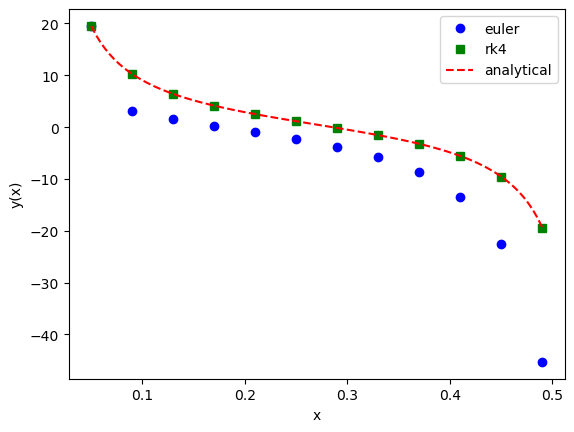

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return - (30/(1-x**2)) + ((2*x)/(1-x**2))*y - y**2

def y_analytical(x):
    '''
    The analytical expression is obtained from Mathematica using DSolve[]
    '''
    yx = (((1.4591566243681633e6 + x * (3.5873015873015874 + x * (-2.1887349365522448e7 + x * (-13.333333333333332 + x * (5.107048185288571e7 + (10. + -3.0642289111731425e7 * x) * x)))) + (-0.23809523809523808 + 3.5714285714285716 * (x ** 2) + -8.333333333333334 * (x ** 4) + 5. * (x ** 6)) * np.log(1. + -1. * x) + (0.23809523809523808 + -3.5714285714285716 * (x ** 2) + 8.333333333333334 * (x ** 4) + -5. * (x ** 6)) * np.log(1. + x)) / (0.13544973544973546 + x * (-1.459156624368163e6 + x * (-1.5555555555555556 + x * (6.809397580384762e6 + (2. + -6.128457822346285e6 * x) * x))) + x * (0.23809523809523808 + -1.1111111111111112 * (x ** 2) + x ** 4) * np.log(1. + -1. * x) + x * (-0.23809523809523808 + 1.1111111111111112 * (x ** 2) + -1. * (x ** 4)) * np.log(1. + x))) / (1. + x)) / (-1. + x)
    return yx

def euler(f,a,b,n,yinit):
    h = (b-a)/(n-1)
    xs = np.linspace(a,b,n)
    ys = np.zeros(n)

    y = yinit
    for j,x in enumerate(xs):
        ys[j] = y
        y += h*f(x, y)
    return xs, ys
        
def rk4(f,a,b,n,yinit):
    h = (b-a)/(n-1)
    xs = np.linspace(a,b,n)
    ys = np.zeros(n)

    y = yinit
    for j,x in enumerate(xs):
        ys[j] = y
        k0 = h*f(x, y)
        k1 = h*f(x+h/2, y+k0/2)
        k2 = h*f(x+h/2, y+k1/2)
        k3 = h*f(x+h, y+k2)
        y += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys
        
if __name__ == '__main__':
    a, b, n, yinit = 0.05, 0.49, 12, 19.53
    xs, ys_euler = euler(f,a,b,n,yinit)
    xs, ys_rk4 = rk4(f,a,b,n,yinit)
    x_ana = np.linspace(a,b,100)
    y_ana = y_analytical(x_ana)
    plt.plot(xs,ys_euler,'bo',label='euler')
    plt.plot(xs,ys_rk4,'gs',label='rk4')
    plt.plot(x_ana,y_ana,'r--',label='analytical')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
   

The fourth-order Runge–Kutta method is fairly robust and should usually be your go-to solution. 

## Simultaneous Differential Equations

### Two Equations
In physical problems, it is quite common that one has to solve two ordinary differential equations together: take the independent variable to be $x$ (as before) and the two dependent variables to be $y_0(x)$ and $y_1(x)$; note that there is nothing discretized going on here: $y_0(x)$ and $y_1(x)$ are functions of $x$ which we must solve for. In the
general case, the two ODEs we need to solve are:
$$
\begin{gather*}
y'_0(x) = f_0(x, y_0(x), y_1(x))
y'_1(x) = f_1(x, y_0(x), y_1(x))
y_0(a) = c_0, y_1(a) = c_1.
\end{gather*}
$$

Crucially, the prototypical problem of a (single) second-order IVP, 
$$
w''(x) = f(x, w, w'),\quad w(a) = c, \quad w'(a) = d
$$
can be re-cast as a set of two simultaneous first-order ODEs. To see that, examine the following two definitions:
$$
\begin{gather*}
y_0(x)  = w(x) \\
y_1(x) = w'(x) = y_0'(x).
\end{gather*}
$$

We can now combine these two equations to get
$$
\begin{gather*}
y_0'(x) = y_1(x) \\
y_1'(x) = f(x, y_0(x), y_1(x)) \\
y_0(a) = c, \quad y_1(a) = d.
\end{gather*}
$$

Thus, we have validated our earlier claim that second-order equations can be seen as simultaneous first-order ones.

### General Case
In general, the problem is to solve $v$ coupled 1st order ODEs (or a single $v$th order ODE). Specifically,
$$
\begin{gather*}
y_i'(x) = f_i(x, y_0(x), y_1(x), \dots, y_{v-1}(x)) \\
y_i(a) = c_i, \quad i = 0,1,\dots,v-1. 
\end{gather*}
$$

We can use the vector notation to rewrite the above equations as
$$
\begin{gather*}
\boldsymbol{y}'(x) = \boldsymbol{f}(x,\boldsymbol{y}(x)) \\
\boldsymbol{y}(a) =  \boldsymbol{c}.
\end{gather*}
$$

After with our vector notation, we are now in a position to start discretizing. The forward Euler method now becomes
$$
\begin{gather*}
\boldsymbol{y}_{j+1} = \boldsymbol{y}_j + h\boldsymbol{f}(x_j,\boldsymbol{y}_j), \quad j = 0,1,\dots,n-2 \\
\boldsymbol{y}_0 =  \boldsymbol{c}.
\end{gather*}
$$

The RK4 prescription turns into
$$
\begin{gather*}
\boldsymbol{k}_0 = h\boldsymbol{f}(x_j, \boldsymbol{y}_j) \\
\boldsymbol{k}_1 = h\boldsymbol{f}(x_j + \frac{h}{2}, \boldsymbol{y}_j + \frac{\boldsymbol{k}_0}{2}) \\
\boldsymbol{k}_2 = h\boldsymbol{f}(x_j + \frac{h}{2},\boldsymbol{y}_j + \frac{\boldsymbol{k}_1}{2}) \\
\boldsymbol{k}_3 = h\boldsymbol{f}(x_j + h, \boldsymbol{y}_j + \boldsymbol{k}_2) \\
\boldsymbol{y}_{j+1} = \boldsymbol{y}_j + \frac{1}{6}\left(\boldsymbol{k}_0 + 2\boldsymbol{k}_1 + 2\boldsymbol{k}_2 + \boldsymbol{k}_3\right).
\end{gather*}
$$

### Implementation
The Riccati equation you saw previously can be recast if one makes the following Riccati transformation: $y(x) = w'(x)/w(x)$, where $w(x)$ is a new function. Using this transformation, @eq-riccati turns into
$$
\begin{gather*}
w''(x) = -\frac{30}{1-x^2}w(x) + \frac{2x}{1-x^2}w'(x) \\
y(0.05) = w'(0.05)/w(0.05) =19.53.
\end{gather*}
$$

Note that in the transformed ODE for $w(x)$, the initial condition is $w'(0.05)/w(0.05) = 19.53$, namely we the values for $w(0.05)$ can be chosen arbitrarily. For example, we can simply take $w(0.05) = 1$, then $w'(0.05) = 19.53$. 

We can rewrite the above 2nd order ODE as two coupled 1st order ODEs:
$$
\begin{gather*}
y_0'(x) = y_1(x) \\
y_1'(x) = -\frac{30}{1-x^2} y_0(x) + \frac{2x}{1-x^2}y_1(x) \\
y_0(0.05) = 1, \quad y_1(0.05) = 19.53.
\end{gather*}
$$

After solving this differential equation, the solution will be denoted as $y_0(x), y_1(x)$. Then the solution to the original Riccati equation will be obtained as
$$
y(x) = y_1(x)/y_0(x).
$$

See the following code.

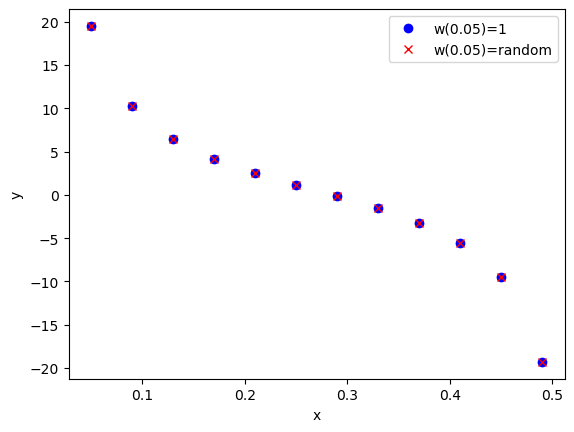

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def fs(x,yvals):
    y0, y1 = yvals
    f0 = y1
    f1 = - (30/(1-x**2))*y0 + ((2*x)/(1-x**2))*y1 
    return np.array([f0, f1])

def rk4_gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = np.linspace(a,b,n)
    ys = np.zeros((n, yinits.size))

    yvals = np.copy(yinits)
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys
        
if __name__ == '__main__':
    a, b, n = 0.05, 0.49, 12
    w_init = 1
    w_init_random = np.random.uniform(0,1)
    yinits = np.array([w_init, 19.53*w_init])
    yinits_random = np.array([w_init_random,19.53*w_init_random])
    xs, ys = rk4_gen(fs,a,b,n,yinits)
    xs, ys_random = rk4_gen(fs,a,b,n,yinits_random) 
    plt.plot(xs,ys[:,1]/ys[:,0],'bo',label='w(0.05)=1')
    plt.plot(xs,ys_random[:,1]/ys_random[:,0],'rx',label='w(0.05)=random')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    # print(ys)